In [1]:
from bs4 import BeautifulSoup
import requests, re

In [2]:
site = 'https://tiki.vn/search?q=b%C3%A1n%20ch%E1%BA%A1y&order=top_seller'
response = requests.get(site)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
product_names = soup.find_all('div')

In [5]:
#product_names[:1]

[<div class="hidden-xs hidden-sm" id="top-bar-container">
 </div>]

In [6]:
type(product_names)

bs4.element.ResultSet

In [8]:
titles = []
for i in range(len(product_names)):
    if product_names[i].has_attr('data-title'): 
        titles.append(product_names[i]['data-title'])

In [10]:
titles[:5]

['Combo Sách Kỹ Năng: Đắc Nhân Tâm + Đọc Vị Bất Kỳ Ai + Quẳng Gánh Lo Đi Và Vui Sống + Tuổi Trẻ Đáng Giá Bao Nhiêu? + Nhà Giả Kim (Top 5 Cuốn Sách Kỹ Năng Sống, Tư Duy Và Làm Việc Bán Chạy Nhất Thế Giới - Tặng Kèm Postcard Green Life)',
 'Combo Cẩm Nang Học Tiếng Hàn Bán Chạy: Tiếng Hàn Tổng Hợp Dành Cho Người Việt Nam - Sơ Cấp 2: Giáo Trình + Sách Bài Tập (Bộ Sách Giúp Bạn Công Phá Tiếng Hàn Thành Công / Tặng Kèm Bookmark Green Life)',
 'Combo 2 Cuốn Sách Tư Duy - Kỹ Năng Sống Hay: Đời Ngắn Đừng Ngủ Dài (Tái Bản) + Đừng Lựa Chọn An Nhàn Khi Còn Trẻ / Những Cuốn Sách Kỹ Năng Sống Bán Chạy Nhất (Tặng Kèm Bookmark Happy Life)',
 'Sách Kỹ Năng Sống Bán Chạy: Nóng Giận Là Bản Năng, Tĩnh Lặng Là Bản Lĩnh (Bí Kíp Tu Dưỡng Một Trái Tim Trong Sáng / Tặng Kèm Bookmark Green Life)',
 'Bộ máy tính để bàn nâng cấp chip intel Pentium chuyên dùng văn phòng, học tập, game nhẹ chạy siêu mượt office, autocard, photoshop, phần mềm kế toán, bán hàng...màn 22 inch mới full box']

In [11]:
books = soup.find_all('p', attrs={"class":"title"})

In [15]:
list_of_titles = [] 
for title in books:
    list_of_titles.append((title.text).strip())

In [16]:
list_of_titles[:5]

['Combo Sách Kỹ Năng: Đắc Nhân Tâm + Đọc Vị...',
 'Combo Cẩm Nang Học Tiếng Hàn Bán Chạy: Tiếng...',
 'Combo 2 Cuốn Sách Tư Duy - Kỹ Năng Sống Hay:...',
 'Sách Kỹ Năng Sống Bán Chạy: Nóng Giận Là Bản...',
 'Bộ máy tính để bàn nâng cấp chip intel...']

In [17]:
# 209.000đ => 209000
def get_price(str_price): 
    price = 0
    str_price = (str_price.text).strip().split() 
    if len(str_price)>0:
        str_price = str_price[0].replace("đ", "")
        price = float(str_price.replace(".", "")) 
    return price

In [18]:
# Cách khắc phục khi 1 element không có cùng các element con
list_of_final_prices = []
list_of_regular_prices = []
prices = soup.find_all('p', attrs={"class":"price-sale"}) 
for section in prices:
    if section.find('span', 'final-price'):
        final = get_price(section.find('span', 'final-price'))
        list_of_final_prices.append(final) 
    else:
        list_of_final_prices.append(0)
        if section.find('span', 'price-regular'):
            regular = get_price(section.find('span', 'price-regular'))
            list_of_regular_prices.append(regular) 
        else:
            list_of_regular_prices.append(0)

In [28]:
list_of_regular_prices

[]

In [19]:
images = soup.find_all('img', attrs={"class":"product-image img-responsive"})

In [21]:
list_of_images = [] 
for image in images:
    list_of_images.append(image["src"].split("/")[-1])

In [22]:
 list_of_images[0:5]

['77be41380a4012da709bf47ce20cfabd.jpg',
 '63e5a65478eceb43395e779b0808f5db.jpg',
 '61466c669c3449da7112d304b16f6c7b.jpg',
 '26473ab04e7d58a4240939a9b372b1e4.jpg',
 '79abffc8816f8b6eb38dd7be37630361.jpg']

In [23]:
import pandas as pd

In [29]:
#check numbers of products
print(len(list_of_titles), len(list_of_final_prices), len(list_of_images))

48 48 48


In [33]:
dictionary_books = {"title": list_of_titles,
                    "final_price": list_of_final_prices,
                    'image': list_of_images}

In [35]:
df = pd.DataFrame(dictionary_books)
df[:5]

,title,final_price,image
0,Combo Sách Kỹ Năng: Đắc Nhân Tâm + Đọc Vị...,270500.0,77be41380a4012da709bf47ce20cfabd.jpg
1,Combo Cẩm Nang Học Tiếng Hàn Bán Chạy: Tiếng...,158400.0,63e5a65478eceb43395e779b0808f5db.jpg
2,Combo 2 Cuốn Sách Tư Duy - Kỹ Năng Sống Hay:...,117500.0,61466c669c3449da7112d304b16f6c7b.jpg
3,Sách Kỹ Năng Sống Bán Chạy: Nóng Giận Là Bản...,77000.0,26473ab04e7d58a4240939a9b372b1e4.jpg
4,Bộ máy tính để bàn nâng cấp chip intel...,4450000.0,79abffc8816f8b6eb38dd7be37630361.jpg


In [38]:
from datetime import datetime
stamp = datetime.now().strftime('%Y%m%d_%H%M%S')

In [39]:
file_name = 'best_seller_books_' + stamp + '.csv' 
#df.to_csv(file_name, encoding='utf-8')

In [40]:
df_new = pd.read_csv(file_name, encoding='utf-8', index_col=0) 
df_new.head()

,title,final_price,image
0,Combo Sách Kỹ Năng: Đắc Nhân Tâm + Đọc Vị...,270500.0,77be41380a4012da709bf47ce20cfabd.jpg
1,Combo Cẩm Nang Học Tiếng Hàn Bán Chạy: Tiếng...,158400.0,63e5a65478eceb43395e779b0808f5db.jpg
2,Combo 2 Cuốn Sách Tư Duy - Kỹ Năng Sống Hay:...,117500.0,61466c669c3449da7112d304b16f6c7b.jpg
3,Sách Kỹ Năng Sống Bán Chạy: Nóng Giận Là Bản...,77000.0,26473ab04e7d58a4240939a9b372b1e4.jpg
4,Bộ máy tính để bàn nâng cấp chip intel...,4450000.0,79abffc8816f8b6eb38dd7be37630361.jpg


In [42]:
## Check image and information
book = df_new.iloc[1] 
book

title          Combo Cẩm Nang Học Tiếng Hàn Bán Chạy: Tiếng...
final_price                                             158400
image                     63e5a65478eceb43395e779b0808f5db.jpg
Name: 1, dtype: object

In [59]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

In [45]:
book.image

'63e5a65478eceb43395e779b0808f5db.jpg'

In [63]:
image = np.array(Image.open("images_tiki/" + book.image))
#open the folder created to contain the images before

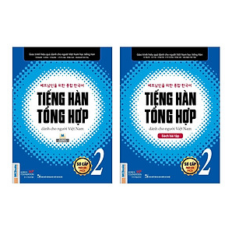

In [64]:
plt.imshow(image, interpolation='bilinear') 
plt.axis('off')
plt.show()